# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numeric_cols)

['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']


In [9]:
df["booking_origin"].nunique()

104

In [10]:
df_encoded = pd.get_dummies(df, columns=['sales_channel', 'trip_type'], drop_first=True)


In [11]:
df_encoded['sales_channel_Mobile'] = df_encoded['sales_channel_Mobile'].astype(int)
df_encoded['trip_type_OneWay'] = df_encoded['trip_type_OneWay'].astype(int)
df_encoded['trip_type_RoundTrip'] = df_encoded['trip_type_RoundTrip'].astype(int)
df_encoded

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,0,0,1
49996,1,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,0,0,1
49997,1,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,0,0,1
49998,1,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,0,0,1


In [12]:
df_encoded['sales_channel_Mobile'] = df_encoded['sales_channel_Mobile'].astype(int)
df_encoded['trip_type_OneWay'] = df_encoded['trip_type_OneWay'].astype(int)
df_encoded['trip_type_RoundTrip'] = df_encoded['trip_type_RoundTrip'].astype(int)
df_encoded

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,0,0,1
49996,1,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,0,0,1
49997,1,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,0,0,1
49998,1,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,0,0,1


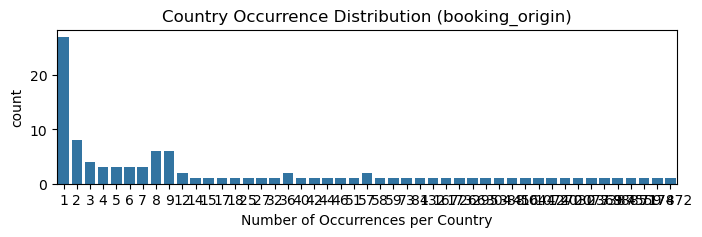

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ülke frekanslarını al
country_counts = df['booking_origin'].value_counts()

# Boxplot çiz
plt.figure(figsize=(8, 2))
sns.countplot(x=country_counts)
plt.title("Country Occurrence Distribution (booking_origin)")
plt.xlabel("Number of Occurrences per Country")
plt.show()


In [14]:
df_encoded

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,0,0,1
49996,1,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,0,0,1
49997,1,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,0,0,1
49998,1,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,0,0,1


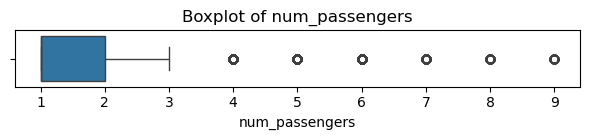

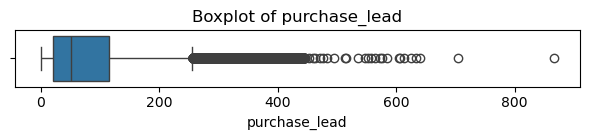

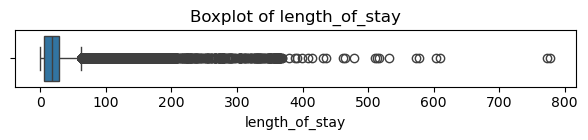

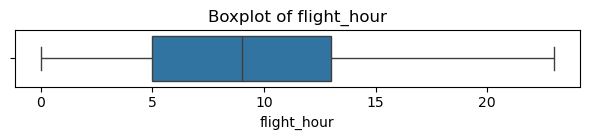

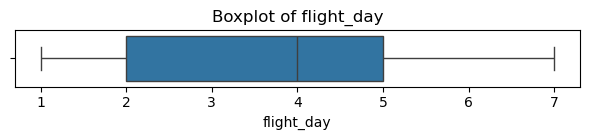

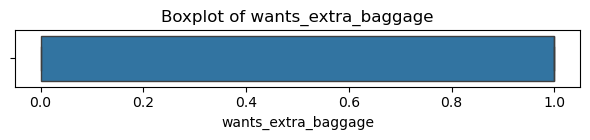

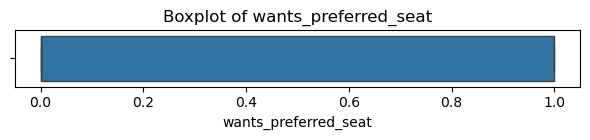

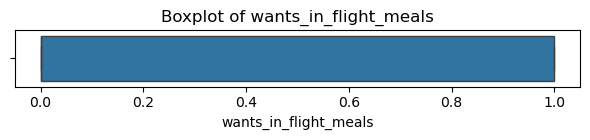

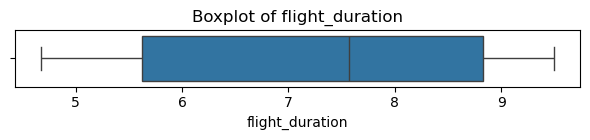

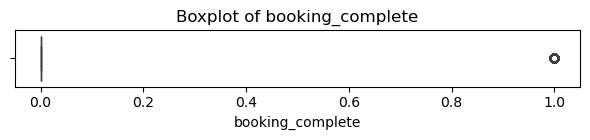

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sadece sayısal sütunları al
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Her bir sayısal sütun için boxplot çiz
for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df_encoded[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


In [16]:
Q1 = df_encoded['purchase_lead'].quantile(0.25)
Q3 = df_encoded['purchase_lead'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print("Üst sınır:", upper_bound)
print("Kaç satır aykırı:", (df_encoded['purchase_lead'] > upper_bound).sum())


Üst sınır: 256.0
Kaç satır aykırı: 3456


In [17]:
Q1 = df_encoded['length_of_stay'].quantile(0.25)
Q3 = df_encoded['length_of_stay'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print("Üst sınır:", upper_bound)
print("Aykırı satır sayısı:", (df_encoded['length_of_stay'] > upper_bound).sum())


Üst sınır: 62.5
Aykırı satır sayısı: 3807


In [18]:
df_encoded['purchase_lead'] = df_encoded['purchase_lead'].clip(upper=256)
df_encoded['length_of_stay'] = df_encoded['length_of_stay'].clip(upper=62)


Aykırı değerleri belirleyip, miktarlarını da göz önünde bulundurarak "clip" uyguladık.

In [19]:
df_encoded.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,79.978080,19.305260,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560,0.112360,0.007740,0.989940
std,1.020165,76.829501,18.232356,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643,0.315812,0.087637,0.099795
min,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,5.000000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,51.000000,17.000000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,115.000000,28.000000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000,0.000000,0.000000,1.000000
max,9.000000,256.000000,62.000000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000,1.000000,1.000000,1.000000


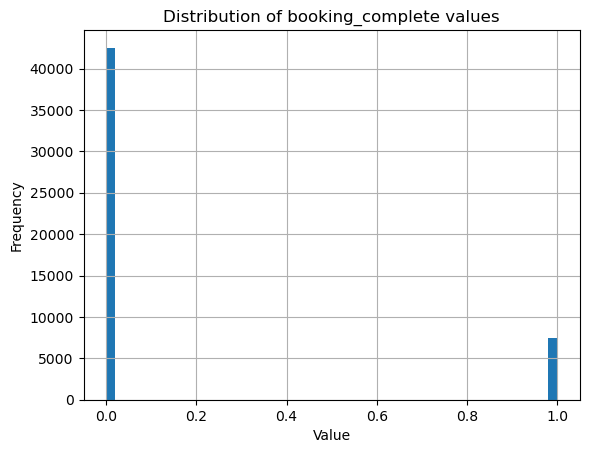

In [20]:
import matplotlib.pyplot as plt

plt.hist(df['booking_complete'], bins=50)
plt.title('Distribution of booking_complete values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



0 ve 1 miktarlarında dengesizlik farkettik ve class_weight='balanced' kullanmaya karar verdik.
Modeli kurmadan önce feauture engineering yapmak için fırsatlar var mı diye değerlendireceğiz.

<Axes: xlabel='purchase_lead', ylabel='Count'>

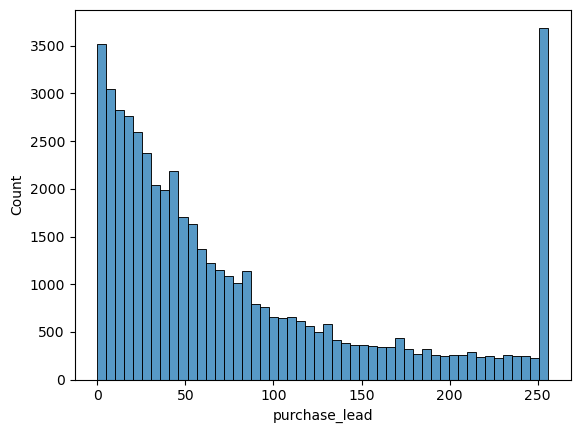

In [21]:
df_encoded['purchase_lead'].describe()
sns.histplot(df_encoded['purchase_lead'], bins=50)


In [22]:
df_encoded['is_early_booking'] = (df_encoded['purchase_lead'] <= 75).astype(int)


<Axes: xlabel='num_passengers', ylabel='count'>

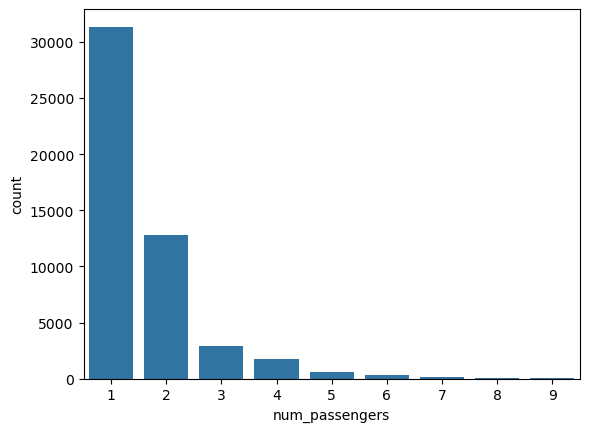

In [23]:
df_encoded['num_passengers'].value_counts().sort_index()
sns.countplot(x='num_passengers', data=df_encoded)



In [24]:
df_encoded['passenger_type'] = pd.cut(
    df_encoded['num_passengers'],
    bins=[0, 1, 2, df_encoded['num_passengers'].max()],
    labels=['solo', 'pair', 'group']
)
df_encoded = pd.get_dummies(df_encoded, columns=['passenger_type'], drop_first=True)


In [25]:
df_encoded = pd.get_dummies(df_encoded, columns=['flight_day'], drop_first=True)


In [26]:
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [27]:
df_encoded['is_weekend_flight'] = df_encoded['flight_day_6'] | df_encoded['flight_day_7']
df_encoded['is_weekend_flight'] = df_encoded['is_weekend_flight'].astype(int)


In [42]:
df_encoded


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,...,is_early_booking,passenger_type_pair,passenger_type_group,flight_day_2,flight_day_3,flight_day_4,flight_day_5,flight_day_6,flight_day_7,is_weekend_flight
0,2,256,19,7,1,0,0,5.52,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,112,20,3,0,0,0,5.52,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2,243,22,17,1,1,0,5.52,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1,96,31,4,0,0,1,5.52,0,0,...,0,0,0,0,0,0,0,1,0,1
4,2,68,22,15,1,0,1,5.52,0,0,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,0,0,...,1,1,0,0,0,0,0,1,0,1
49996,1,111,6,4,0,0,0,5.62,0,0,...,0,0,0,0,0,0,0,0,1,1
49997,1,24,6,22,0,0,1,5.62,0,0,...,1,0,0,0,0,0,0,1,0,1
49998,1,15,6,11,1,0,1,5.62,0,0,...,1,0,0,0,0,0,0,0,0,0


Verilerimiz hazır şimdi sıra modeli kurmakta.

In [47]:
df_encoded

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,...,is_early_booking,passenger_type_pair,passenger_type_group,flight_day_2,flight_day_3,flight_day_4,flight_day_5,flight_day_6,flight_day_7,is_weekend_flight
0,2,256,19,7,1,0,0,5.52,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,112,20,3,0,0,0,5.52,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2,243,22,17,1,1,0,5.52,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1,96,31,4,0,0,1,5.52,0,0,...,0,0,0,0,0,0,0,1,0,1
4,2,68,22,15,1,0,1,5.52,0,0,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,0,0,...,1,1,0,0,0,0,0,1,0,1
49996,1,111,6,4,0,0,0,5.62,0,0,...,0,0,0,0,0,0,0,0,1,1
49997,1,24,6,22,0,0,1,5.62,0,0,...,1,0,0,0,0,0,0,1,0,1
49998,1,15,6,11,1,0,1,5.62,0,0,...,1,0,0,0,0,0,0,0,0,0


In [50]:
X = df_encoded.drop('booking_complete', axis=1)
y = df_encoded['booking_complete']


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',  # Imbalanced veri için şart
    n_jobs=-1                 # Tüm çekirdekleri kullan
)


In [53]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')
print("F1 skorları (5-Fold):", cv_scores)
print("Ortalama F1:", cv_scores.mean())


F1 skorları (5-Fold): [0.07819549 0.10279001 0.0988764  0.08077786 0.09460458]
Ortalama F1: 0.09104887023850154


In [54]:
from sklearn.model_selection import cross_val_score
cv_auc = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')
print("ROC AUC (mean):", cv_auc.mean())


ROC AUC (mean): 0.6485799334385501


In [55]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

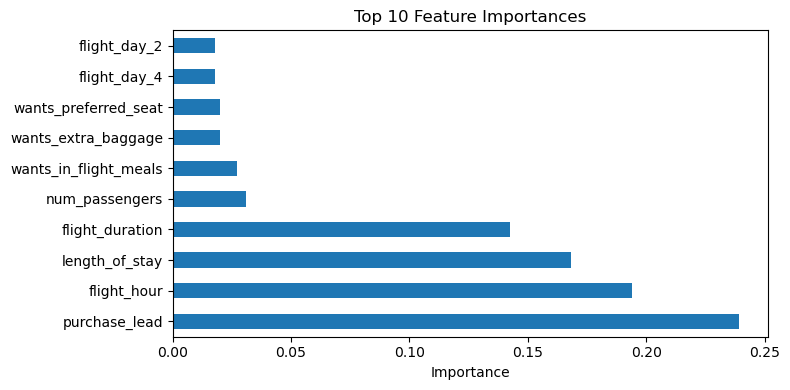

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh', title='Top 10 Feature Importances', figsize=(8, 4))
plt.xlabel('Importance')
plt.tight_layout()
plt.show()



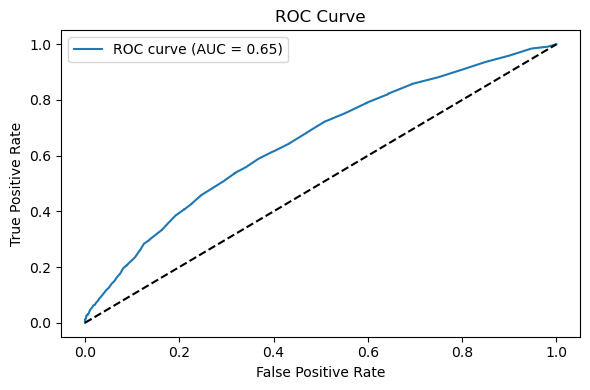

In [57]:
from sklearn.metrics import roc_curve, auc

y_scores = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


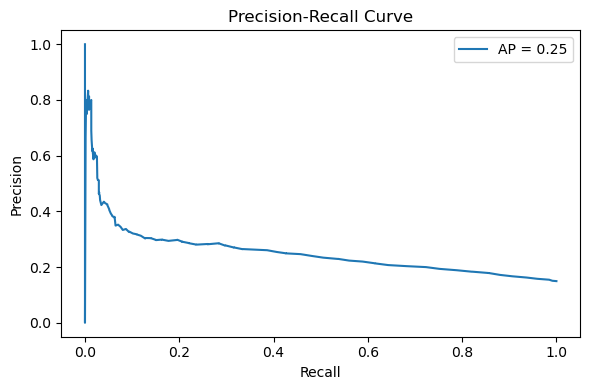

In [58]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_prec = average_precision_score(y_test, y_scores)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f"AP = {avg_prec:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.tight_layout()
plt.show()


In [59]:
from sklearn.metrics import f1_score

best_threshold = 0
best_f1 = 0

for thresh in [x / 100 for x in range(10, 90, 5)]:  # 0.10'dan 0.85'e kadar
    y_pred_thresh = (y_scores >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    print(f"Threshold: {thresh:.2f}, F1 Score: {f1:.4f}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh

print(f"\n🔍 Best Threshold: {best_threshold}, Best F1 Score: {best_f1}")


Threshold: 0.10, F1 Score: 0.3079
Threshold: 0.15, F1 Score: 0.3201
Threshold: 0.20, F1 Score: 0.3203
Threshold: 0.25, F1 Score: 0.2952
Threshold: 0.30, F1 Score: 0.2564
Threshold: 0.35, F1 Score: 0.2116
Threshold: 0.40, F1 Score: 0.1630
Threshold: 0.45, F1 Score: 0.1239
Threshold: 0.50, F1 Score: 0.0962
Threshold: 0.55, F1 Score: 0.0642
Threshold: 0.60, F1 Score: 0.0556
Threshold: 0.65, F1 Score: 0.0426
Threshold: 0.70, F1 Score: 0.0313
Threshold: 0.75, F1 Score: 0.0263
Threshold: 0.80, F1 Score: 0.0185
Threshold: 0.85, F1 Score: 0.0146

🔍 Best Threshold: 0.2, Best F1 Score: 0.3202996956216343


In [60]:
from sklearn.metrics import classification_report

y_pred_best = (y_scores >= 0.20).astype(int)
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.89      0.75      0.82      8504
           1       0.25      0.46      0.32      1496

    accuracy                           0.71     10000
   macro avg       0.57      0.61      0.57     10000
weighted avg       0.79      0.71      0.74     10000



In [61]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
print(f"With threshold 0.20: Precision = {precision:.3f}, Recall = {recall:.3f}")


With threshold 0.20: Precision = 0.246, Recall = 0.457


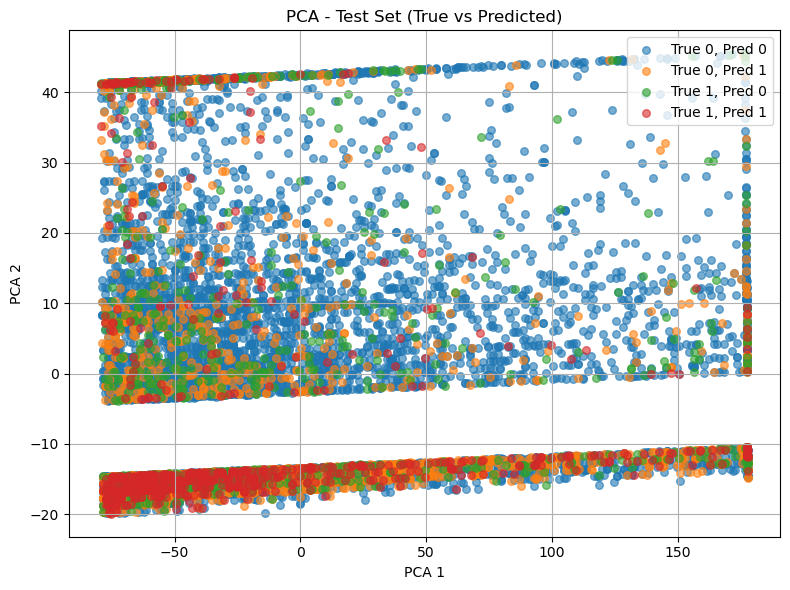

In [62]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA ile 2 boyuta indir
pca = PCA(n_components=2)
X_test_2D = pca.fit_transform(X_test)

# Gerçek sınıf = renk
# Tahmin başarısı = şekil

plt.figure(figsize=(8,6))
for true_label in [0, 1]:
    for pred_label in [0, 1]:
        idx = (y_test == true_label) & (y_pred_best == pred_label)
        label = f"True {true_label}, Pred {pred_label}"
        plt.scatter(
            X_test_2D[idx, 0],
            X_test_2D[idx, 1],
            label=label,
            alpha=0.6,
            s=30
        )

plt.title("PCA - Test Set (True vs Predicted)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Veri setindeki dengesizlikleri gidermek için oversampling ile 1 sınıfını çoğaltarak daha dengeli bir öğrenme sağlayan yeni bir model kuracağız.

In [66]:
from sklearn.utils import resample

# Eğitim setini tek DataFrame olarak birleştir
Xy_train = X_train.copy()
Xy_train['booking_complete'] = y_train

# Sınıfları ayır
df_majority = Xy_train[Xy_train.booking_complete == 0]
df_minority = Xy_train[Xy_train.booking_complete == 1]

# 1 sınıfını çoğalt
df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=int(len(df_majority) * 0.75),
    random_state=42
)

# Birleştir, karıştır
df_balanced = pd.concat([df_majority, df_minority_upsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42)

# Özellikleri ve hedefi tekrar ayır
X_train_balanced = df_balanced.drop('booking_complete', axis=1)
y_train_balanced = df_balanced['booking_complete']



In [67]:
print("0 sınıfı:", len(df_majority))
print("1 sınıfı (upsampled):", len(df_minority_upsampled))


0 sınıfı: 34018
1 sınıfı (upsampled): 25513


In [68]:
# Önce feature importances'ı al
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features = feat_imp.nlargest(10).index  # 🔥 Sadece en iyi 10 özellik

# Sadece bunlarla yeni veri kümesi oluştur
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]



In [69]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,            # 🌲 Ağacın derinliğini sınırla
    min_samples_split=10,    # Daha fazla örnekle bölünsün
    min_samples_leaf=5,      # En az 5 veri olmalı yaprakta
    max_features='sqrt',     # Her ağaç daha az özelliğe baksın
    random_state=42,
    n_jobs=-1
)


In [71]:
# Önce upsample edilmiş X_train_balanced'ı kullan
X_train_selected = X_train_balanced[top_features]


In [72]:
rf.fit(X_train_selected, y_train_balanced)


RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_jobs=-1, random_state=42)

In [73]:
from sklearn.model_selection import cross_val_score

cv_f1 = cross_val_score(rf, X_train_selected, y_train_balanced, cv=5, scoring='f1')
cv_auc = cross_val_score(rf, X_train_selected, y_train_balanced, cv=5, scoring='roc_auc')

print("CV F1 scores:", cv_f1)
print("Mean F1:", cv_f1.mean())
print("Mean AUC:", cv_auc.mean())


CV F1 scores: [0.60314114 0.60350877 0.60689949 0.61603644 0.60376551]
Mean F1: 0.6066702699044184
Mean AUC: 0.7556443294767705


In [74]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = rf.predict(X_test_selected)
y_proba = rf.predict_proba(X_test_selected)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC on test set:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.89      0.78      0.83      8504
           1       0.27      0.46      0.34      1496

    accuracy                           0.74     10000
   macro avg       0.58      0.62      0.59     10000
weighted avg       0.80      0.74      0.76     10000

ROC AUC on test set: 0.677985642805399


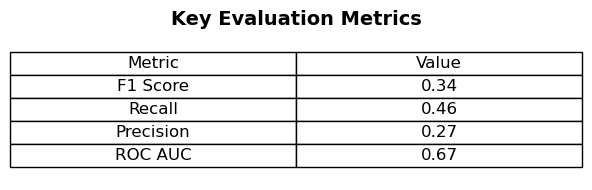

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Verileri bir tablo gibi hazırlayalım
metrics = {
    "Metric": ["F1 Score", "Recall", "Precision", "ROC AUC"],
    "Value": [0.34, 0.46, 0.27, 0.67]
}

df_metrics = pd.DataFrame(metrics)

# Görselleştirme
fig, ax = plt.subplots(figsize=(6, 2))  # Slayta uygun boyut

# Tabloyu çiz
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_metrics.values,
                 colLabels=df_metrics.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)  # Genişlik, yükseklik

plt.title("Key Evaluation Metrics", fontsize=14, weight='bold', pad=10)

plt.tight_layout()
plt.savefig("key_metrics_table.png", dpi=300)
plt.show()


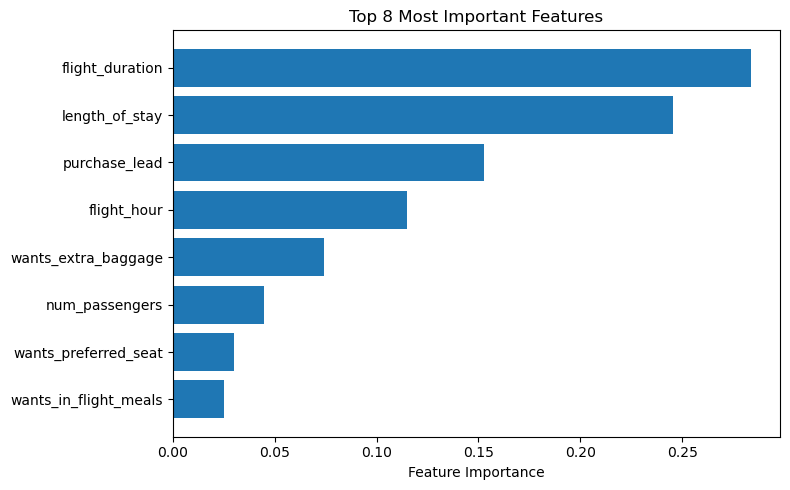

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Feature importances al
importances = rf.feature_importances_
feature_names = X_train_selected.columns  # ya da X_train_balanced.columns[top_features]

# En önemli 8 özelliği al
indices = np.argsort(importances)[-8:]  # son 8'i al (önem sırasına göre)
plt.figure(figsize=(8, 5))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 8 Most Important Features')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()


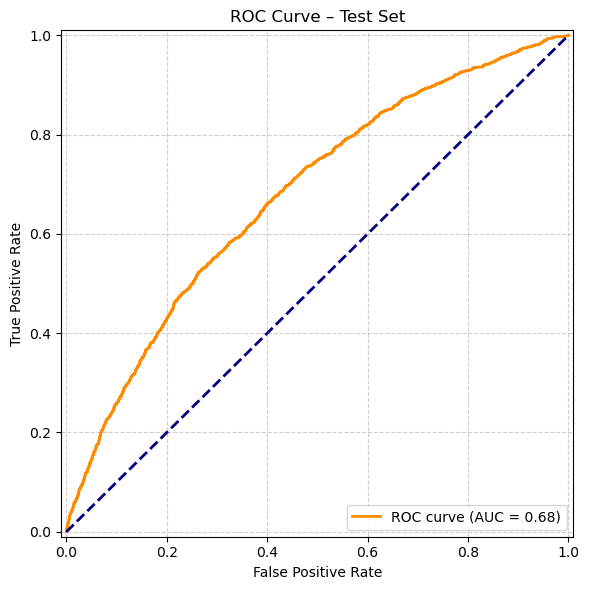

In [77]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)  # y_proba = rf.predict_proba(X_test_selected)[:, 1]
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Test Set')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300)
plt.show()
